## ASSIGNMENT - ADVANCED REGRESSION 

## PROBLEM STATEMENT - PART I

## UPGRAD IIITB EPGP in ML & AI - MLC39
### By:

- PADMAVATHI D

## INTRODUCTION

- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

## PROBLEM STATEMENT

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

     - Which variables are significant in predicting the price of a house, and

     - How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

## BUSINESS GOAL

- Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## ANALAYSIS APPROACH

- Develop a regression model using regularisation to find the variables which are significant in predicting the price of a house.
- It will be used by the management to understand and manipulate the business strategy to meet the price of house & meet the customer's expectation.

## IMPORTING PACKAGES

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## LOADING THE DATASET

In [3]:
# Importing dataset

house_price_data = pd.read_csv("train.csv", encoding = 'utf-8')
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## DATA DESCRIPTION

- MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

- MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
- Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
- LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
- LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
- Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
- LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
- LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
- Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
- Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
- HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
- OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

- RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
- RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
- Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
- BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
- BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
- BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
- HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- CentralAir: Central air conditioning

       N	No
       Y	Yes
		
- Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
- 1stFlrSF: First Floor square feet
 
- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

- Kitchen: Kitchens above grade

- KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
- Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
- MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold (MM)

- YrSold: Year Sold (YYYY)

- SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
- SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [4]:
# inspect house Info dataframe

print("Info") 
print(house_price_data.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Ove

#### Observations

- In the dataset, there are

     - 3 features of float type
     - 35 features of integer type
     - 43 feature of object type


In [5]:
#To check the number of rows & columns present in dataset
print(" Shape ") 
print(house_price_data.shape)

 Shape 
(1460, 81)


#### Observations
- The dataset comprises of 1460 rows and 81 columns

In [6]:
print(" Columns having null values ")
print(house_price_data.isnull().any())

 Columns having null values 
Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


In [7]:
#To check the details of numeriacl data
print(" Describe ")
house_price_data.describe()

 Describe 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## DATA CLEANING

- Removing/Imputing NaN values in Categorical attributes

In [8]:
# check for null values in all categorical columns

house_price_data.select_dtypes(include='object').isnull().sum()[house_price_data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Remove categorical attributes that have more than 85% data associated to one value.

- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [9]:
# Replacing NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house_price_data[col]=house_price_data[col].fillna('None')

In [10]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = house_price_data.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_price_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

house_price_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [11]:
# once again check for null values in all categorical columns

house_price_data.select_dtypes(include='object').isnull().sum()[house_price_data.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

#### Observation

- We can observe that there are no more null values in the categorical variables.

#### Removing null values in Numerical attributes

In [12]:
# check the null values in the numerical data

house_price_data.select_dtypes(include=['int64','float']).isnull().sum()[house_price_data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# Imputing the null values with median values for LotFrontage and MasVnrArea columns

house_price_data['LotFrontage'] = house_price_data['LotFrontage'].replace(np.nan, house_price_data['LotFrontage'].median())
house_price_data['MasVnrArea'] = house_price_data['MasVnrArea'].replace(np.nan, house_price_data['MasVnrArea'].median())

In [14]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

house_price_data['GarageYrBlt']=house_price_data['GarageYrBlt'].fillna(0)
house_price_data['GarageYrBlt'] = house_price_data['GarageYrBlt'].astype(int)

In [15]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house_price_data['IsRemodelled'] = house_price_data.apply(checkForRemodel, axis=1)
house_price_data.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [16]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house_price_data['BuiltOrRemodelAge'] = house_price_data.apply(getBuiltOrRemodelAge, axis=1)
house_price_data.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [17]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house_price_data['OldOrNewGarage'] = house_price_data['GarageYrBlt'].apply(getGarageConstructionPeriod)
house_price_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [18]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we would only be using the derived columns for further analysis

house_price_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### Remove numerical attributes that have more than 85% data associated to one value.

- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [19]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house_price_data.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_price_data[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house_price_data.drop(columnsToBeRemoved, axis = 1, inplace = True)

house_price_data.drop(['MoSold'], axis = 1, inplace = True)

house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [20]:
# check for percentage of null values in each column

percent_missing = round(100*(house_price_data.isnull().sum()/len(house_price_data.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


#### Observation

- We can observe that there are no null values in the dataset

## Check for Duplicates

In [21]:
# To Check if there are any duplicate values in the dataset

house_price_data[house_price_data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


#### Observation

- We can observe that there are no duplicate entries found.

## OUTLIER TREATMENT

In [22]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house_price_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


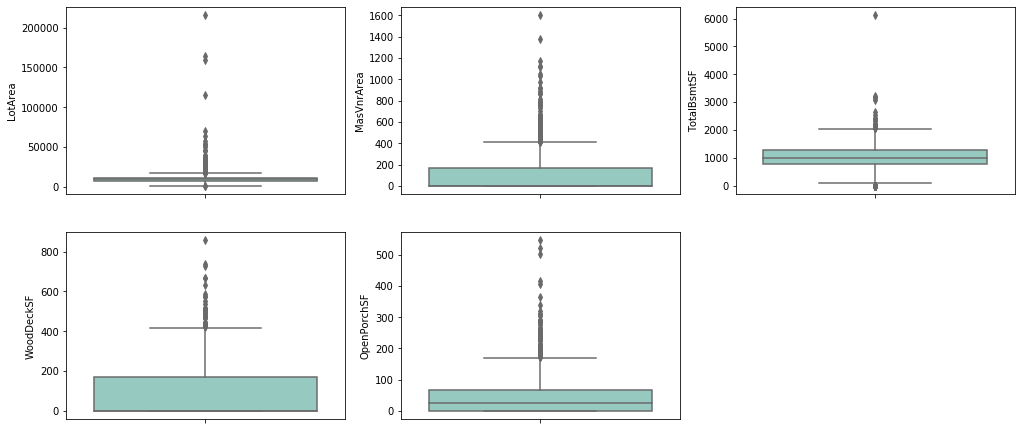

In [23]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_price_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_price_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_price_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_price_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_price_data)
plt.show()

In [24]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = house_price_data['LotArea'].quantile(0.98)
house_price_data = house_price_data[house_price_data["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house_price_data['MasVnrArea'].quantile(0.98)
house_price_data = house_price_data[house_price_data["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house_price_data['TotalBsmtSF'].quantile(0.99)
house_price_data = house_price_data[house_price_data["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house_price_data['WoodDeckSF'].quantile(0.99)
house_price_data = house_price_data[house_price_data["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house_price_data['OpenPorchSF'].quantile(0.99)
house_price_data = house_price_data[house_price_data["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [25]:
# To Determine the percentage of data retained

num_data = round(100*(len(house_price_data)/1460),2)
print(num_data)

93.01


## EXPLORATORY DATA ANALYSIS

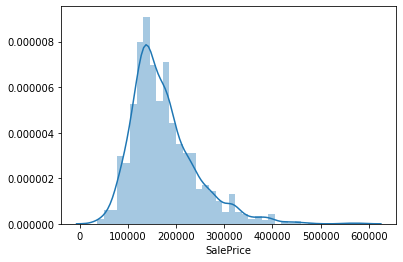

In [26]:
sns.distplot(house_price_data['SalePrice'])

#### Observation

- From the above graph we can observe that the Saleprice figures are skewed towards left, hence we will apply the log transformation to obtain a centralized data

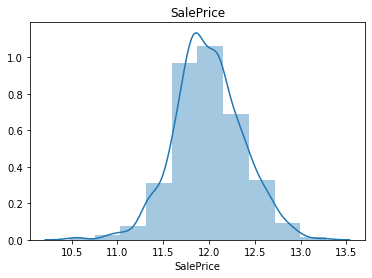

In [27]:
# Visualisation of the target variable -> SalePrice after transforming the sales price

house_price_data['SalePrice'] = np.log1p(house_price_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_price_data['SalePrice'], bins=10)
plt.show()

#### Observation

- From the above graph, we can observe that the target value seems to be normalized with some noise.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

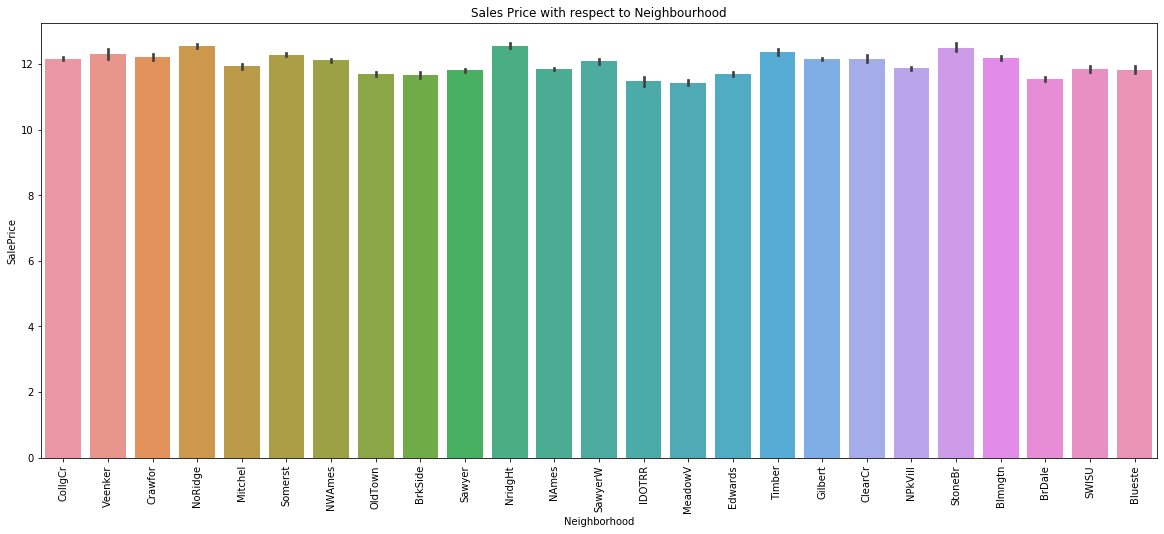

In [28]:
# Visualisation of 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house_price_data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### Observation

- From the above graph, we can obsereve that the properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

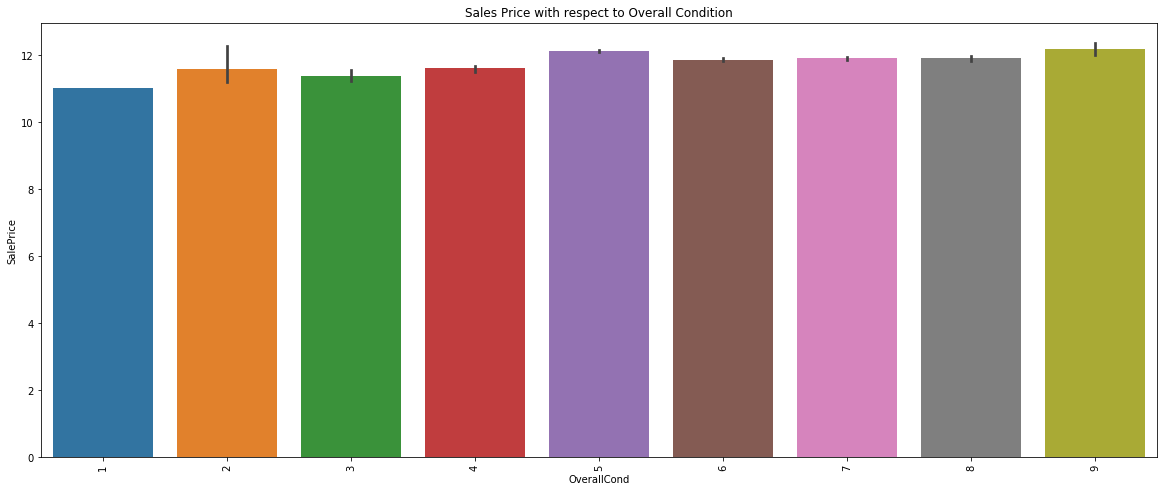

In [29]:
# Visualisation of 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house_price_data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

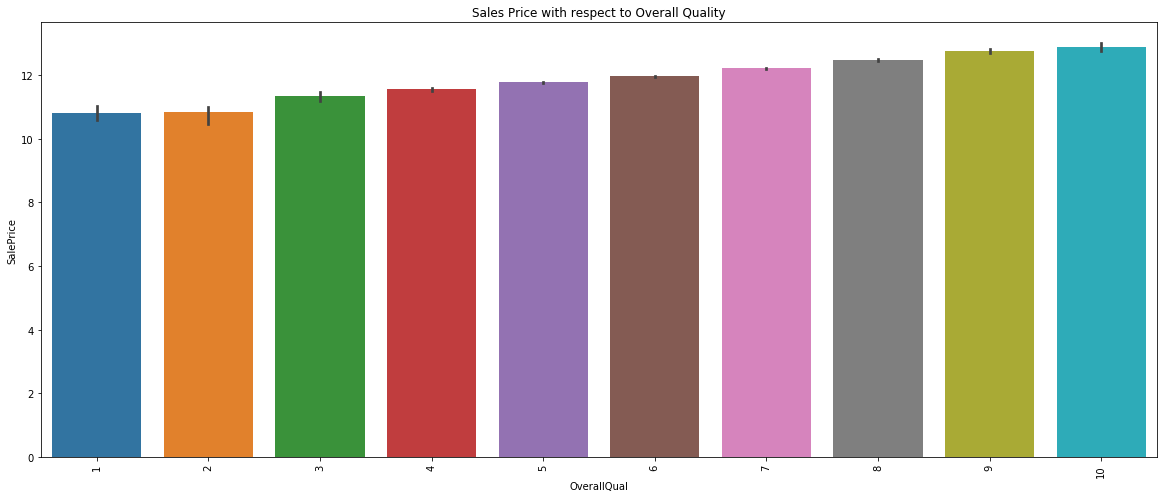

In [30]:
# Visualisation of 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house_price_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Observation

- From the above graph, we can obsereve that the increase in the overall quality has a direct positive effect on the sale price.

<Figure size 720x360 with 0 Axes>

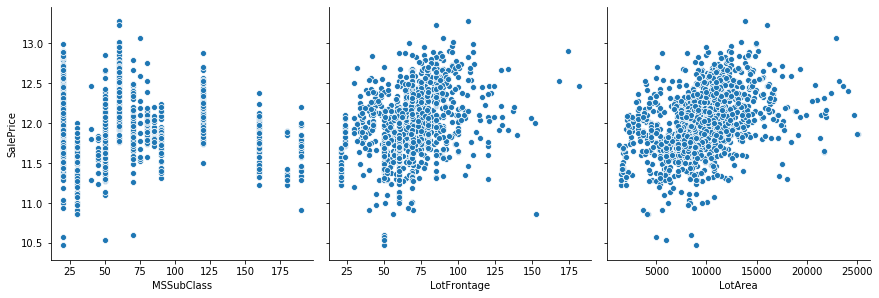

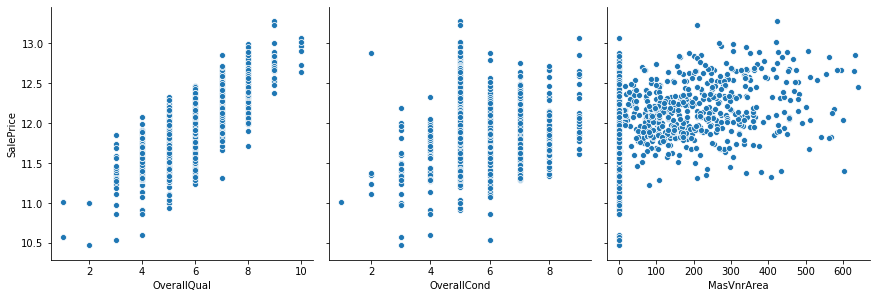

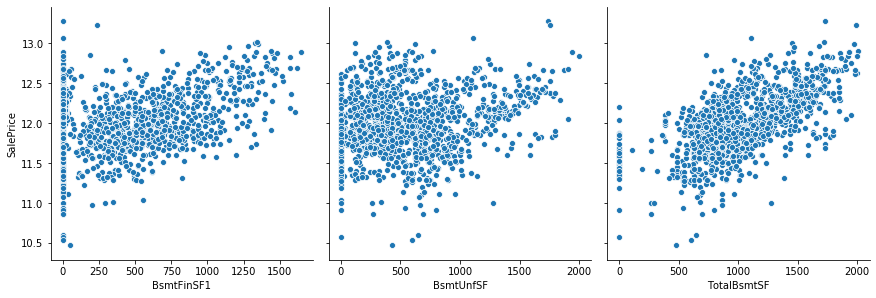

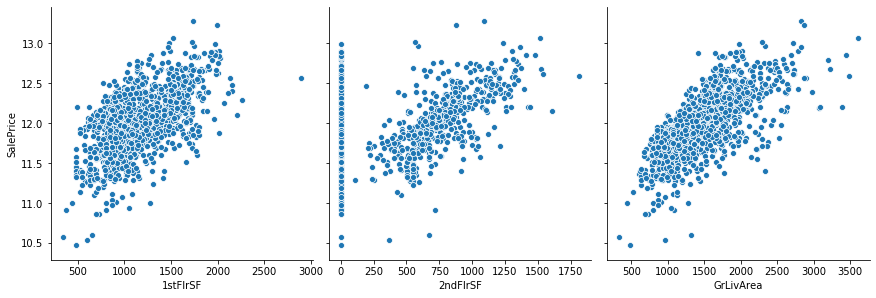

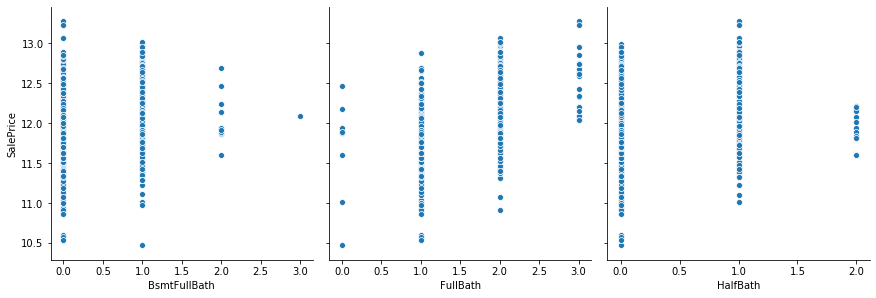

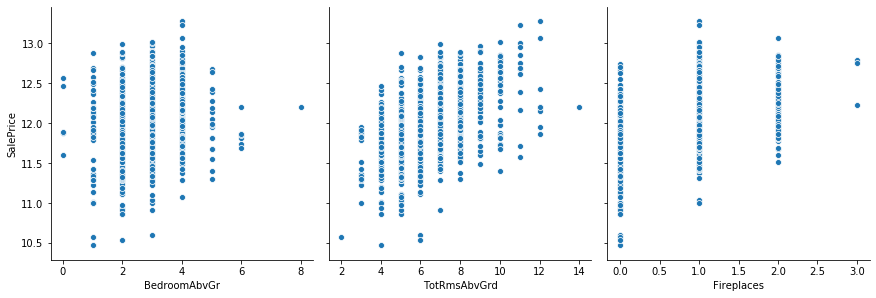

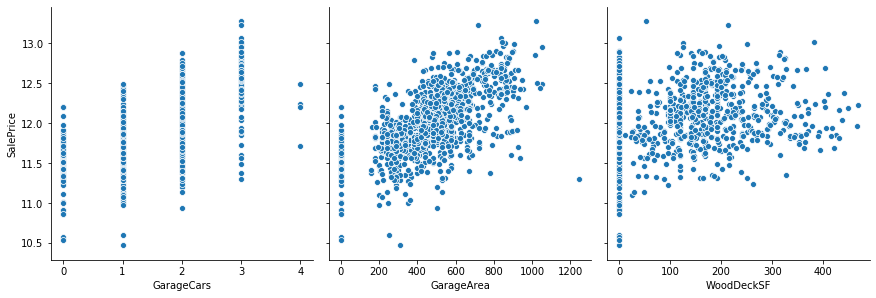

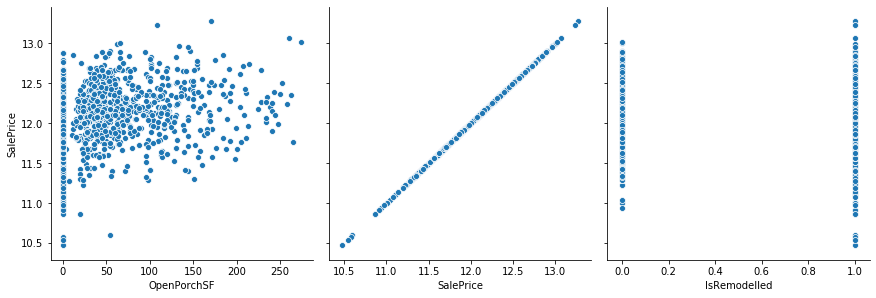

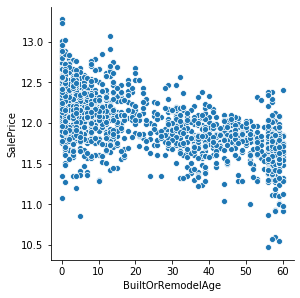

In [31]:
# To Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house_price_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_price_data, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

#### Observations 

- From the above pairplot, we can observe the followings:

    - 1stFlrSF, GrLivArea seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

In [32]:
# correlation matrix
cor = house_price_data.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
Id,1.000000,0.011880,-0.021860,-0.007403,-0.022829,0.011214,-0.039100,-0.013113,-0.007546,-0.020687,...,0.018035,-0.009454,0.016031,0.012624,-0.040778,-0.037938,-0.015771,0.010197,0.010050,0.014642
MSSubClass,0.011880,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,...,0.051450,-0.031299,-0.040892,-0.105249,-0.030496,0.004843,-0.059653,-0.047843,-0.048133,0.040748
LotFrontage,-0.021860,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,...,0.305140,0.203051,0.272192,0.304673,0.079295,0.134818,0.340837,-0.046754,-0.065145,0.078414
LotArea,-0.007403,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,...,0.370356,0.308544,0.258948,0.296699,0.136089,0.133542,0.380824,0.002721,-0.039391,-0.017580
OverallQual,-0.022829,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,...,0.386576,0.377691,0.586480,0.539509,0.219328,0.358891,0.813190,-0.100826,-0.548074,0.563296
OverallCond,0.011214,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,...,-0.047843,-0.011391,-0.177895,-0.136103,0.003890,-0.055243,-0.024053,0.317140,-0.073388,-0.290144
MasVnrArea,-0.039100,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,...,0.241253,0.224874,0.336142,0.338542,0.123847,0.164114,0.380392,-0.162473,-0.142217,0.165754
BsmtFinSF1,-0.013113,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,...,-0.038561,0.204278,0.189729,0.230009,0.195079,0.064733,0.352239,-0.126288,-0.121970,0.011541
BsmtUnfSF,-0.007546,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,...,0.238135,0.039859,0.204051,0.175354,-0.040374,0.137854,0.203529,0.031564,-0.174480,0.335792
TotalBsmtSF,-0.020687,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,...,0.214726,0.277055,0.421145,0.444024,0.202218,0.224610,0.611669,-0.110048,-0.303012,0.329473


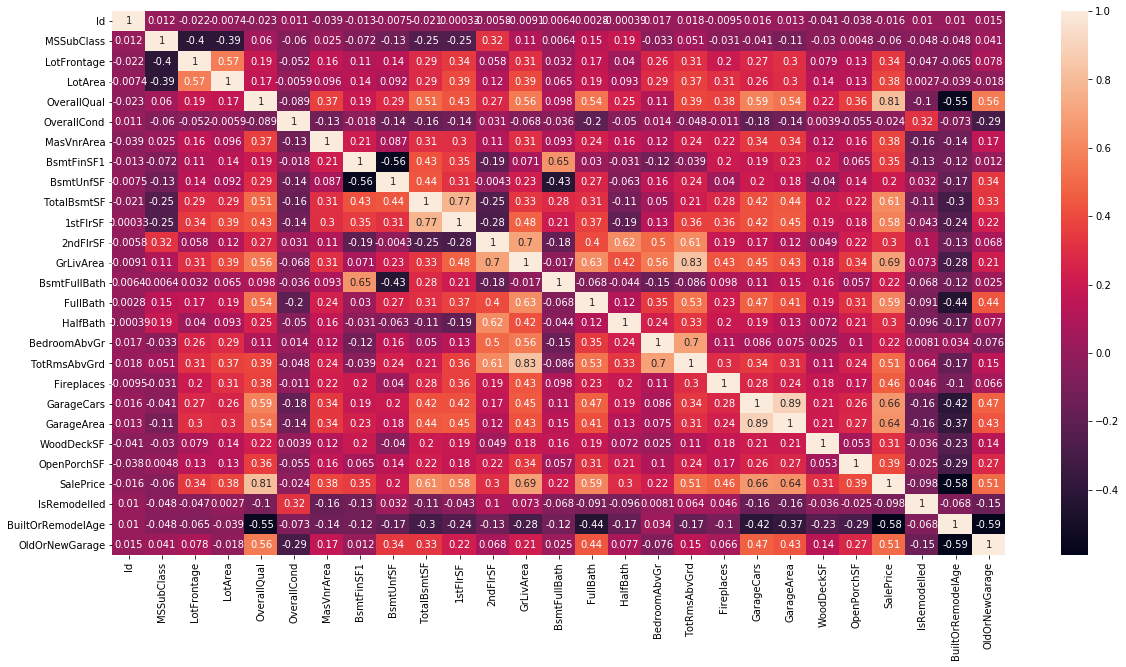

In [33]:
# To Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house_price_data.corr(), annot = True)
plt.show()

#### Removing following columns which shows high correlation

- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [34]:
# Removing the highly correlated variables

house_price_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [35]:
# To Check the shape of the dataframe

house_price_data.shape

(1358, 47)

## DATA PREPARATION

- Converting categorical data into numercal data
- Creating Dummies

In [36]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

house_price_data['d_LotShape'] = house_price_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_price_data['d_ExterQual'] = house_price_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_price_data['d_BsmtQual'] = house_price_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['d_BsmtExposure'] = house_price_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_price_data['d_BsmtFinType1'] = house_price_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house_price_data['d_HeatingQC'] = house_price_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['d_KitchenQual'] = house_price_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['d_FireplaceQu'] = house_price_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_price_data['d_GarageFinish'] = house_price_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house_price_data['d_BldgType'] = house_price_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house_price_data['d_HouseStyle'] = house_price_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_price_data['d_Fence'] = house_price_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house_price_data['d_LotConfig'] = house_price_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house_price_data['d_MasVnrType'] = house_price_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_price_data['d_SaleCondition'] = house_price_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [37]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

house_price_data = house_price_data.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house_price_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


#### Creation of dummies for the following columns
 
- drop_first = True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

In [38]:
# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house_price_data['MSZoning'], prefix='MSZoning', drop_first = True)
house_price_data = pd.concat([house_price_data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house_price_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
house_price_data = pd.concat([house_price_data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house_price_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
house_price_data = pd.concat([house_price_data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house_price_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
house_price_data = pd.concat([house_price_data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house_price_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house_price_data = pd.concat([house_price_data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house_price_data['Foundation'], prefix='Foundation', drop_first = True)
house_price_data = pd.concat([house_price_data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house_price_data['GarageType'], prefix='GarageType', drop_first = True)
house_price_data = pd.concat([house_price_data, d_GarageType], axis = 1)

house_price_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [39]:
# drop the below columns as we now have new columns derived from these columns

house_price_data = house_price_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house_price_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [40]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 561.2 KB


#### Observation

- We can observe that all the columns in the data set are now numeric.

## SPLIT THE DATASET INTO TRAIN DATA & TEST DATA

In [41]:
# Assigning all feature variable to X

X = house_price_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [42]:
# Assigning response variable to y

y = house_price_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## FEATURE SCALING

- Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [43]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [44]:
# split into train and test

from sklearn.model_selection import train_test_split


np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## RECURSIVE FEATURE ELIMINATION (RFE)

- Since there are around 111 features, we will use RFE to get the best 40 features out of the 111 features and use the new features for further analysis

In [45]:
# Running RFE with the output number of the variable equal to 40

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 40)           
rfe = rfe.fit(X_train, y_train)

In [46]:
# Assigning the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# Assigning the 40 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,HalfBath,True,1
9,Fireplaces,True,1


In [47]:
# Assigning the 40 columns to X_train_rfe

X_train_rfe = X_train[col]

In [48]:
# Associating the new 40 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## MODEL BUILDING & EVALUATION

## RIDGE REGRESSION

In [49]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [50]:
# To display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,4,-0.079938,-0.084602,1
16,5,-0.079954,-0.084604,2
17,6,-0.079974,-0.084607,3
18,7,-0.079995,-0.084613,4
19,8,-0.080020,-0.084620,5
14,3,-0.079930,-0.084628,6
20,9,-0.080046,-0.084639,7
21,10,-0.080072,-0.084661,8
13,2,-0.079931,-0.084684,9
12,1,-0.079950,-0.084768,10


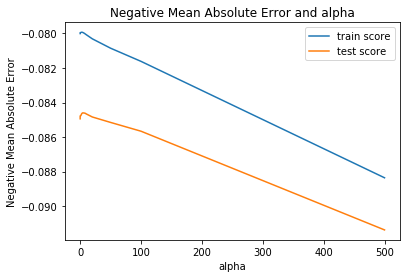

In [51]:
# Visualisation of mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [52]:
# To get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
# To check the coefficient values with lambda = 4

alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02106997,  0.07386982,  0.04414723,  0.03818595,  0.05073008,
        0.01531424,  0.01706716,  0.08472076,  0.01639729,  0.02093891,
        0.03984367,  0.0105475 , -0.01354513, -0.02289282,  0.01095637,
        0.01113876,  0.01640402,  0.01844046,  0.01562672,  0.0170692 ,
       -0.02162911,  0.01484848,  0.07060297,  0.02561712,  0.10710508,
        0.07645741,  0.02767081,  0.02317033, -0.01247026,  0.01740025,
       -0.01103887,  0.01476947, -0.03635547, -0.03343702, -0.01909679,
        0.03241939,  0.02018386,  0.02041305,  0.04219801,  0.01703095])

In [54]:
# To Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013553849233212482

In [55]:
from sklearn import metrics
# ridge regression
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9158977425870722
0.9025764131981605


In [56]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1164209999665545


In [57]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0211
1,OverallQual,0.0739
2,OverallCond,0.0441
3,BsmtFinSF1,0.0382
4,TotalBsmtSF,0.0507
5,1stFlrSF,0.0153
6,2ndFlrSF,0.0171
7,GrLivArea,0.0847
8,HalfBath,0.0164
9,Fireplaces,0.0209


In [58]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0211,
 'OverallQual': 0.0739,
 'OverallCond': 0.0441,
 'BsmtFinSF1': 0.0382,
 'TotalBsmtSF': 0.0507,
 '1stFlrSF': 0.0153,
 '2ndFlrSF': 0.0171,
 'GrLivArea': 0.0847,
 'HalfBath': 0.0164,
 'Fireplaces': 0.0209,
 'GarageCars': 0.0398,
 'WoodDeckSF': 0.0105,
 'IsRemodelled': -0.0135,
 'BuiltOrRemodelAge': -0.0229,
 'OldOrNewGarage': 0.011,
 'd_BsmtQual': 0.0111,
 'd_BsmtExposure': 0.0164,
 'd_HeatingQC': 0.0184,
 'd_KitchenQual': 0.0156,
 'd_GarageFinish': 0.0171,
 'd_BldgType': -0.0216,
 'd_SaleCondition': 0.0148,
 'MSZoning_FV': 0.0706,
 'MSZoning_RH': 0.0256,
 'MSZoning_RL': 0.1071,
 'MSZoning_RM': 0.0765,
 'Neighborhood_Crawfor': 0.0277,
 'Neighborhood_NridgHt': 0.0232,
 'Neighborhood_OldTown': -0.0125,
 'Neighborhood_StoneBr': 0.0174,
 'Exterior1st_BrkComm': -0.011,
 'Exterior1st_Stucco': 0.0148,
 'Exterior1st_VinylSd': -0.0364,
 'Exterior1st_Wd Sdng': -0.0334,
 'Exterior2nd_Stucco': -0.0191,
 'Exterior2nd_VinylSd': 0.0324,
 'Exterior2nd_Wd Sdng': 0.0202,
 'Foundation_CB

#### RFE

In [59]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [60]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.1071
5,GrLivArea,True,1,0.0847
12,MSZoning_RM,True,1,0.0765
1,OverallQual,True,1,0.0739
9,MSZoning_FV,True,1,0.0706
4,TotalBsmtSF,True,1,0.0507
2,OverallCond,True,1,0.0441
14,Foundation_PConc,True,1,0.0422
7,GarageCars,True,1,0.0398
3,BsmtFinSF1,True,1,0.0382


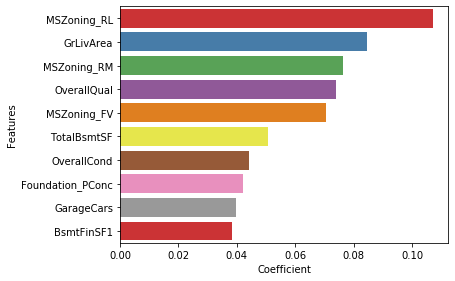

In [61]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

#### Observation

- From the above graph, we can observe the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

## LASSO REGRESSION

In [62]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
# To display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.080034,-0.084764,1
1,0.0002,-0.079987,-0.084767,2
0,0.0001,-0.079969,-0.084791,3
3,0.0004,-0.080113,-0.084818,4
4,0.0005,-0.080217,-0.084948,5
5,0.001,-0.080655,-0.085438,6
6,0.002,-0.081377,-0.085984,7
7,0.003,-0.081745,-0.086280,8
8,0.004,-0.082064,-0.086530,9
9,0.005,-0.082437,-0.086829,10


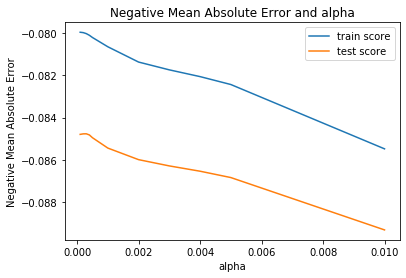

In [64]:
# Visualisation of mean test and train scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [65]:
#To get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
#To check the coefficient values with lambda = 0.0003

alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.0208351 ,  0.0750348 ,  0.04398688,  0.03837689,  0.05072538,
        0.00146649,  0.        ,  0.10308478,  0.01621853,  0.0208495 ,
        0.04020821,  0.0103856 , -0.0133567 , -0.02292777,  0.0104567 ,
        0.01030483,  0.01633146,  0.01814987,  0.01542637,  0.01722794,
       -0.02120471,  0.01476124,  0.07235682,  0.02610694,  0.11094108,
        0.07902423,  0.027386  ,  0.02259647, -0.01248187,  0.01684423,
       -0.01083736,  0.01276639, -0.02879135, -0.03194466, -0.01708307,
        0.02516286,  0.01820427,  0.01881309,  0.04082587,  0.01603877])

In [67]:
#To Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013404631222233608

In [68]:
# lasso regression
from sklearn import metrics

# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9158868899977957
0.9036489759509891


In [69]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11577837113309898


In [70]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0208
1,OverallQual,0.0750
2,OverallCond,0.0440
3,BsmtFinSF1,0.0384
4,TotalBsmtSF,0.0507
5,1stFlrSF,0.0015
6,GrLivArea,0.1031
7,HalfBath,0.0162
8,Fireplaces,0.0208
9,GarageCars,0.0402


In [71]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.020835095518796157,
 'OverallQual': 0.0750347990138421,
 'OverallCond': 0.04398688136838544,
 'BsmtFinSF1': 0.03837689419747611,
 'TotalBsmtSF': 0.050725377824058816,
 '1stFlrSF': 0.0014664900224589173,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.10308478038143772,
 'HalfBath': 0.016218534514240622,
 'Fireplaces': 0.020849503029016198,
 'GarageCars': 0.040208205717069616,
 'WoodDeckSF': 0.010385602891018574,
 'IsRemodelled': -0.013356704824050564,
 'BuiltOrRemodelAge': -0.02292777354707349,
 'OldOrNewGarage': 0.010456700820602105,
 'd_BsmtQual': 0.010304827833361514,
 'd_BsmtExposure': 0.016331461305110595,
 'd_HeatingQC': 0.01814986749081158,
 'd_KitchenQual': 0.015426366656460263,
 'd_GarageFinish': 0.017227939753682996,
 'd_BldgType': -0.021204714393113267,
 'd_SaleCondition': 0.014761240325043537,
 'MSZoning_FV': 0.07235682430434037,
 'MSZoning_RH': 0.026106943872695236,
 'MSZoning_RL': 0.11094108004373116,
 'MSZoning_RM': 0.07902423237076905,
 'Neighborhood_Crawfor': 0.0273860

#### RFE

In [72]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [73]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.110941
5,GrLivArea,True,1,0.103085
12,MSZoning_RM,True,1,0.079024
1,OverallQual,True,1,0.075035
9,MSZoning_FV,True,1,0.072357
4,TotalBsmtSF,True,1,0.050725
2,OverallCond,True,1,0.043987
14,Foundation_PConc,True,1,0.040826
7,GarageCars,True,1,0.040208
3,BsmtFinSF1,True,1,0.038377


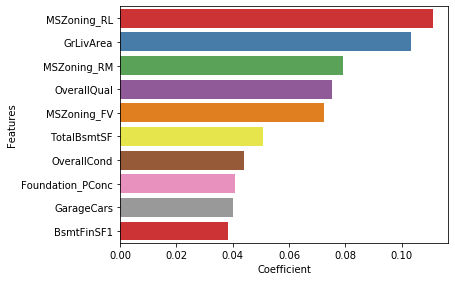

In [74]:
# bar plot to determine the variables that would affect pricing most using lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

#### Observation

- From the above graph, we can observe the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

## INFERENCE

### lambda value

- The optimal lambda value in case of Ridge and Lasso is as below:

   - Ridge - 4
   - Lasso - 0.0003
   
### Root Mean Square Error

- The RMSE value in case of Ridge & Lasso is as below 

    - Ridge - 0.1164209999665545
    - Lasso - 0.11577837113309898
   
### Mean Squared Error

- The Mean Squared error in case of Ridge and Lasso are:

   - Ridge - 0.013553849233212482
   - Lasso - 0.013404631222233608

- The Mean Squared Error of Lasso is slightly lower than that of Ridge
   
### R2 score

- The R2 score for Ridge regression
 
   - y_train_pred - 0.9158977425870722
   - y_test_pred - 0.9025764131981605

- The R2 score for Lasso regression

   - y_train_pred - 0.9158868899977957
   - y_test_pred - 0.9036489759509891
   
   
- Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test,it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choosethe predictive variables.It is always advisable to use simple yet robust model.Equation can be formulated using the features and coefficients obtained by Lasso.






- Log (Y) = Constant + 0.110941(MSZoning_RL) + 0.103085(GrLivArea) + 0.079024(MSZoning_RM) + 0.075035(OverallQual) + 0.072357(MSZoning_FV) + 0.050725(TotalBsmtSF) + 0.043987(OverallCond) + 0.040826(Foundation_PConc) + 0.040208(GarageCars) + 0.038377(BsmtFinSF1) + Error term (RSS + alpha * (sum of absolute value of coefficients)

- Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.The higher values of positive coeeficients suggest a high sale value.Some of those features are:-

   - GrLivArea 
   - OverallQual
   - OverallCond
   - TotalBsmtSF
   - GarageCars
   - MSZoning_RL

- The higher values of negative coeeficients suggest a decrease in sale value.Some of those features are:-

   - MSSubClass

- When the market value of the property is lower than the Predicted Sale Price, its the time to buy.


## CONCLUSION

Since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

In [75]:
print("#############################################################################################################################")

#############################################################################################################################


## PROBLEM STATEMENT - PART II

#### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer

The optimal value of alpha in case of Ridge and Lasso is as below:

- Ridge - 4
- Lasso - 0.0003

double the value of alpha for both ridge and lasso

#### RIDGE

In [76]:
# To check the coefficient values 

alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02093946,  0.07420336,  0.04426208,  0.03826195,  0.05017818,
        0.02234382,  0.02460387,  0.07590802,  0.01670542,  0.02130117,
        0.03936926,  0.01055096, -0.01390692, -0.02319034,  0.01084731,
        0.01127967,  0.01625192,  0.01839787,  0.01593485,  0.01686675,
       -0.02130463,  0.01525   ,  0.06226507,  0.02142045,  0.0910705 ,
        0.06200079,  0.02740233,  0.02271036, -0.01209889,  0.0170936 ,
       -0.01091844,  0.01420337, -0.03097163, -0.03209496, -0.0184835 ,
        0.02741633,  0.01904408,  0.01941529,  0.04118654,  0.0166971 ])

In [77]:
# To Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013541101804388653

In [78]:
from sklearn import metrics
# ridge regression
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.915535419024454
0.9026680403232045


In [79]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1163662399684232


In [80]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0209
1,OverallQual,0.0742
2,OverallCond,0.0443
3,BsmtFinSF1,0.0383
4,TotalBsmtSF,0.0502
5,1stFlrSF,0.0223
6,2ndFlrSF,0.0246
7,GrLivArea,0.0759
8,HalfBath,0.0167
9,Fireplaces,0.0213


In [81]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [82]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.1071
5,GrLivArea,True,1,0.0847
12,MSZoning_RM,True,1,0.0765
1,OverallQual,True,1,0.0739
9,MSZoning_FV,True,1,0.0706
4,TotalBsmtSF,True,1,0.0507
2,OverallCond,True,1,0.0441
14,Foundation_PConc,True,1,0.0422
7,GarageCars,True,1,0.0398
3,BsmtFinSF1,True,1,0.0382


#### LASSO

In [83]:
#To check the coefficient values 

alpha = 0.0006

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02042948,  0.07687579,  0.04413726,  0.03868963,  0.05011455,
        0.00270447,  0.        ,  0.10208821,  0.01647051,  0.02123419,
        0.03978624,  0.0102156 , -0.01366892, -0.0233507 ,  0.00981142,
        0.00956543,  0.01602036,  0.01782951,  0.01555637,  0.01697595,
       -0.02035711,  0.01525319,  0.06185675,  0.02046278,  0.09107099,
        0.06031406,  0.02670593,  0.0213888 , -0.0119018 ,  0.01586998,
       -0.01046928,  0.01014827, -0.01374773, -0.02865501, -0.01440768,
        0.01092895,  0.01482829,  0.01614525,  0.03845729,  0.01471702])

In [84]:
#To Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013277571664564227

In [85]:
# lasso regression
# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9152028714596191
0.904562266163431


In [86]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11522834575122662


In [87]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0204
1,OverallQual,0.0769
2,OverallCond,0.0441
3,BsmtFinSF1,0.0387
4,TotalBsmtSF,0.0501
5,1stFlrSF,0.0027
6,GrLivArea,0.1021
7,HalfBath,0.0165
8,Fireplaces,0.0212
9,GarageCars,0.0398


In [88]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [89]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.110941
5,GrLivArea,True,1,0.103085
12,MSZoning_RM,True,1,0.079024
1,OverallQual,True,1,0.075035
9,MSZoning_FV,True,1,0.072357
4,TotalBsmtSF,True,1,0.050725
2,OverallCond,True,1,0.043987
14,Foundation_PConc,True,1,0.040826
7,GarageCars,True,1,0.040208
3,BsmtFinSF1,True,1,0.038377


Hence the most important features after the changes are

- GrLivArea
- OverallQual
- OverallCond
- TotalBsmtSF
- GarageCars
- MSZoning_RL

Predictors are same but the coefficent of these predictor has changed

#### Remaining questions & answers for Problem statement - Part II is in PDF as per the requirement.